In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

sys.path.append('../modules')
from nsw import Node, NSWGraph
import data_gen as dg

# Drawing helper

In [2]:
def show(points, highlight=None, leader=None, target=None):
    plt.figure(figsize=(10, 10))
    plt.scatter(points[:, 0], points[:, 1], marker="*", color="orange")
    if highlight is not None:
        plt.scatter(highlight[:, 0], highlight[:, 1], marker="*", color="blue")
    if leader is not None:     
        plt.scatter(leader[:, 0], leader[:, 1], marker="o", color="black", s=100)
    if target is not None:     
        plt.scatter(target[:, 0], target[:, 1], marker="o", color="red", s=100)
    plt.show()

# Prepare the random graph

Size = 4000, K = 9
graph build
converged in 11 steps


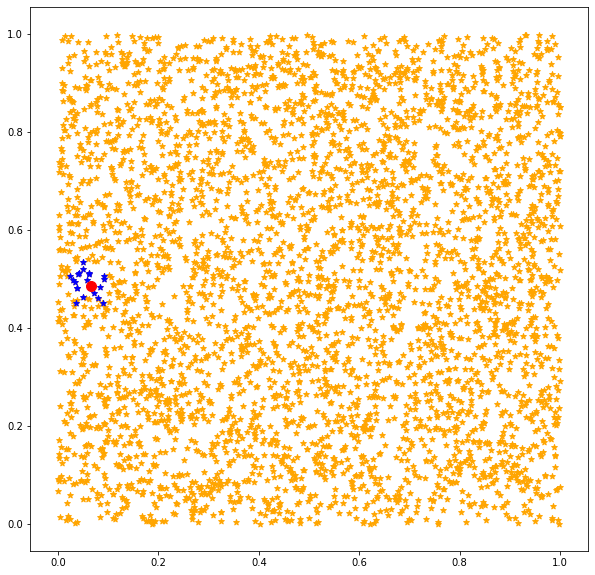

In [8]:
size = 4000
dim = 2
target = np.random.rand(1, dim)
K = math.ceil(math.log(size))
print(f"Size = {size}, K = {K}")

data = np.random.rand(size, dim)
data_labelled = [(row, 0) for row in data]

G = NSWGraph()
G.build_navigable_graph(data_labelled,  K=K, attempts=10)
print("graph build")
# G.plot()
items, hops = G.search_nsw_basic(target, top=20)
print(f"converged in {hops} steps")
result = data[items, :]
show(data, result, target=target)

In [10]:
def callback_searcher(leader, cloud):
    subset = data[np.array(cloud)[:,1].astype(int),:]
    clear_output(wait=True)
    show(data, subset, leader=leader.reshape(1, -1), target=target)
    time.sleep(1)

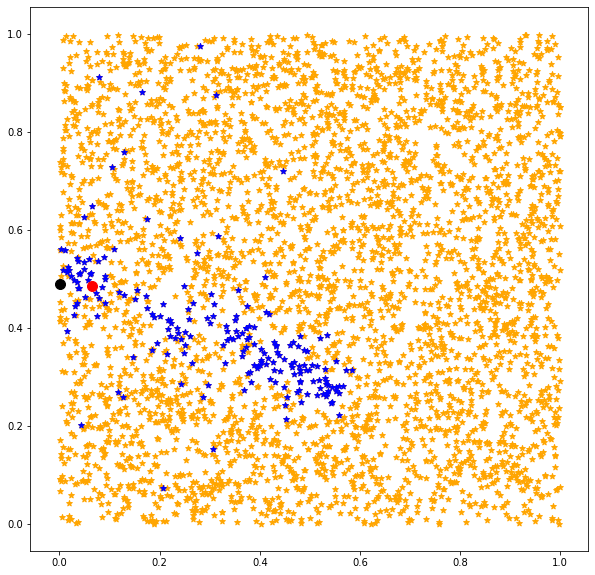

Converged in 10 hops


In [13]:
items, hops = G.search_nsw_basic(target, top=20, callback=callback_searcher)
print(f"Converged in {hops} hops")